https://www.youtube.com/watch?v=-vHQub0NXI4
regression explanation

https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l02c01_celsius_to_fahrenheit.ipynb#scrollTo=VM7_9Klvq7MO
colab code - great documentation

https://keras.io/
keras library documentation
(it's amazing, use it)

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# celsius and fahrenheit measured values
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [4]:
# print out both values
for i, c in enumerate(celsius):
	print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit[i]))
print('\n')

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit




features - inputs to model
labels - output the model predicts
example - pair of input/output, example: (celsius, fahr) pair: (38, 100)

In [5]:
layer0 = tf.keras.layers.Dense(units=1, input_shape=[1])

Class: CeckpointableBase -> Checkpointable -> Module -> Layer -> Dense
input_shape[1] - specifies input to this layer is a single value
one-dimensional array with one member
units=1 - specifies number of neurons in the layer
number of neurons defines how many internal variables 
the layer has to try to learn to solve the problem

In [6]:
# assemble defined layers into model
model = tf.keras.Sequential([layer0])
# Class: Model -> Sequential

Instructions for updating:
Colocations handled automatically by placer.


more often defined as:
model = tf.keras.Sequential
    ([
    tf.keras.layers.Dense(units=1, input_shape=[1])
    ])

before training, model has to be compiled

arguments of compile function:
compile(optimizer, loss=None, metrics=None, loss_weights=None, sample_weight_mode=None, weighted_metrics=None,target_tensors=None)

read more about it at: https://keras.io/models/model/

In [7]:
model.compile(loss='mean_squared_error', 
	optimizer=tf.keras.optimizers.Adam(0.1))

# 'mean_squared_error' = 'mse'

Instructions for updating:
Use tf.cast instead.


loss f. - measurement of difference between predicted and real value
optimizer f. - adjusting internal values to reduce loss f.

'mean_squared_error' = 'mse'
read more about it at: https://en.wikipedia.org/wiki/Mean_squared_error

Adam optimizer f. - standard for simple models
set learning rate to: 0.1 - 0.001 (default)
read more about it at: 
https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

In [8]:
history = model.fit(celsius, fahrenheit, epochs=500, verbose=False)
print("Finished training the model\n")

Instructions for updating:
Use tf.cast instead.
Finished training the model



input-celsius, output-fahrenheit
model takes celsius values, performs a calculation using current 
internal variables (called "weights") and outputs fahrenheit value

arguments of fit function:
fit(x=None, y=None, batch_size=None, epochs=1, verbose=1,callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1)

read more about it at:
https://keras.io/models/model/

plotting the transfer function
see how loss f. gets smaller (better prediction) the more epoch's it trains

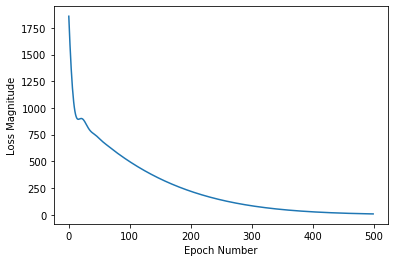

In [14]:
plt.xlabel("Epoch Number")
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [10]:
print("The predicted fahrenheit value for degree celsius 100.0 is : \n")
print(model.predict([100.0]))

The predicted fahrenheit value for degree celsius 100.0 is : 

[[211.33388]]


the predicted value is: 211.something
which is quite good
real value: 212

In [11]:
print("These are the layer variables: {}".format(layer0.get_weights()))

These are the layer variables: [array([[1.8211797]], dtype=float32), array([29.215895], dtype=float32)]


the predicted weights are: 1.8something, and 29.something
which is nearly correct
for the conversion equation: fahr = 1.8*cel + 32

testing again with 3 different layers

In [12]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])  
l1 = tf.keras.layers.Dense(units=4)  
l2 = tf.keras.layers.Dense(units=1)  
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius, fahrenheit, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is:\n {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables:\n {}".format(l0.get_weights()))
print("These are the l1 variables:\n {}".format(l1.get_weights()))
print("These are the l2 variables:\n {}".format(l2.get_weights()))

Finished training the model
[[211.74744]]
Model predicts that 100 degrees Celsius is:
 [[211.74744]] degrees Fahrenheit
These are the l0 variables:
 [array([[ 0.01050507, -0.26555654,  0.24436545, -0.73255754]],
      dtype=float32), array([ 0.87662125, -3.757296  , -3.0958495 , -3.9557316 ], dtype=float32)]
These are the l1 variables:
 [array([[-0.30887094,  0.0685653 , -0.10340834,  0.12138316],
       [-0.39086753,  1.29357   ,  0.36696762, -0.36000794],
       [-0.9444656 ,  0.34906524,  0.1046998 , -0.9799289 ],
       [-0.22749618,  1.0863179 ,  0.71106017, -1.2329452 ]],
      dtype=float32), array([ 1.8836079, -3.610284 , -1.7861451,  3.954502 ], dtype=float32)]
These are the l2 variables:
 [array([[ 0.32809713],
       [-0.9576996 ],
       [-0.1828484 ],
       [ 0.87913376]], dtype=float32), array([3.5989761], dtype=float32)]
